### 2023년 07월 06일 : 데이터 처리 - 2

(1) 2차 데이터 정비로 확정한 변수들의 데이터 로드를 확인하고

(2) 계절조정이 되지 않은 계열에 대하여 X13-arima_analsis 를 이용하여 계절조정을 시행한다. 
> 오프라인에서만 X13_arima 프로그램 작동함. 오프라인에서 데이터셋 정비하여 올려야함.

(3) 또한 lag가 있는 경우 이를 데이터 셋에 반영한다.

In [1]:
import os
os.chdir(r'D:\2023\Sadj\x13as_ascii-v1-1-b59\x13as')
from datetime import datetime as dt
import time

import numpy as np
import pandas as pd
import openpyxl
import pprint as pp

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("Python set up modules loaded")
print("Python version:\n", os.sys.version, "\nPlatform: ", os.sys.platform)
print("Base directory path:", os.getcwd())
print("Data/time:", dt.now())

import statsmodels as sma
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.x13 import x13_arima_select_order, _find_x12

print("STATSMODELS info (statsmodels._version.version_json)", sma._version.version_json)
# v0.13.0 만 json version 정보 있음. v0.14.0 부터 없음.

Python set up modules loaded
Python version:
 3.8.5 (tags/v3.8.5:580fbb0, Jul 20 2020, 15:57:54) [MSC v.1924 64 bit (AMD64)] 
Platform:  win32
Base directory path: D:\2023\Sadj\x13as_ascii-v1-1-b59\x13as
Data/time: 2023-07-07 15:25:47.943614


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


STATSMODELS info (statsmodels._version.version_json) 
{
 "date": "2021-11-12T23:19:44+0000",
 "dirty": false,
 "error": null,
 "full-revisionid": "70647db97dd1eb65399ee18d474c257d466e33b4",
 "version": "0.13.1"
}



In [2]:
# 데이터 저장 위치에 excel files  확인
data_path = 'D:/2023/Data_WareHouse/ECOS(한국은행경제통계)/Data_02'
data_list = [file for file in os.listdir(data_path) if file.endswith(".xlsx")]
data_list.sort()
for d, f in enumerate(data_list):
  print(data_list[d], "---", d)

M2.xlsx --- 0
dataset_01.xlsx --- 1
dataset_02.xlsx --- 2
계열정리.xlsx --- 3
기계수주액_01134039.xlsx --- 4
변수목록_d.xlsx --- 5
복수통계_01140009.xlsx --- 6
선택계열.xlsx --- 7
신용카드_01140906.xlsx --- 8
아파트 매매 실거래가격지수_01135002.xlsx --- 9


In [3]:
# dataset_01.xlsx file 안에 있는 sheet에서 사용할 계열(입력 데이터 variable) 확을 위한 sheet 를 load
var_info = pd.read_excel(os.path.join(data_path,data_list[2]),sheet_name=0,header=0)
print(var_info.head(),"\n")

# dataset variable list
var_list = var_info['Variable'].iloc[1:]

Sadj=var_info['계절조정'][1:]
x13_arima=var_info['X13-arima'][1:]
print(f"전체 사용 변수의 개수 -------------- {len(var_list)}")
print(f"계절조정 된 계열의 개수 ------------ {sum(Sadj == 'o')}")
print(f"계절조정 되지 않은 계열의 개수 ----- {sum(Sadj == 'x')}")
print(f"X13-arima로 계열조정 해야 하는 개수- {sum(x13_arima == 'o')}")

    ID Group    Variable   단위  FEQ  LAG 계절조정 X13-arima               비고  \
0  NaN   NaN         NaN  NaN  NaN  NaN  NaN       NaN              NaN   
1   A1  주요지표  국내총생산(GDP)   %     Q  2.0    o         x  (실질, 계절조정, 전기비)   
2   A2   NaN        민간소비   %     Q  2.0    o         x  (실질, 계절조정, 전기비)   
3   A3   NaN        설비투자   %     Q  2.0    o         x  (실질, 계절조정, 전기비)   
4   A4   NaN        건설투자   %     Q  2.0    o         x  (실질, 계절조정, 전기비)   

   Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12 Unnamed: 13  
0         NaN          NaN          NaN          NaN         NaN  
1         NaN          NaN          NaN          NaN         NaN  
2         NaN          NaN          NaN          NaN         NaN  
3         NaN          NaN          NaN          NaN         NaN  
4         NaN          NaN          NaN          NaN         NaN   

전체 사용 변수의 개수 -------------- 102
계절조정 된 계열의 개수 ------------ 41
계절조정 되지 않은 계열의 개수 ----- 61
X13-arima로 계열조정 해야 하는 개수- 61


In [4]:
dataset_Q = pd.read_excel(os.path.join(data_path,data_list[2]),sheet_name=2,header=2)
print(dataset_Q.head())
col_Q = dataset_Q.columns
print(f"\n변수의 개수 -------------- {len(col_Q)}")
print(f"데이터의 길이 ------------ {len(dataset_Q.iloc[2:])}")
for i, col in enumerate(col_Q):
  print(f"{col}계열의 NaN 개수 ----- {sum(dataset_Q[col].iloc[2:].isna())}")

print(f"\n{dataset_Q.iloc[2:3]}")
print(f"\n{dataset_Q.iloc[-1:]}")

      date   A1   A2    A3    A4    A5    A6
0       단위   %    %     %     %     %     % 
1  1960/Q1  NaN  NaN   NaN   NaN   NaN   NaN
2  1960/Q2  4.5  5.4  15.6   3.5  34.1     1
3  1960/Q3 -1.1   -4   -14 -16.7  -5.5 -25.1
4  1960/Q4  0.6  3.9   2.2   -10  17.3   5.7

변수의 개수 -------------- 7
데이터의 길이 ------------ 255
date계열의 NaN 개수 ----- 0
A1계열의 NaN 개수 ----- 3
A2계열의 NaN 개수 ----- 3
A3계열의 NaN 개수 ----- 3
A4계열의 NaN 개수 ----- 3
A5계열의 NaN 개수 ----- 3
A6계열의 NaN 개수 ----- 3

      date   A1   A2    A3   A4    A5 A6
2  1960/Q2  4.5  5.4  15.6  3.5  34.1  1

        date   A1   A2   A3   A4   A5   A6
256  2023/Q4  NaN  NaN  NaN  NaN  NaN  NaN


In [6]:
# 계열 time index 및 길이 조정
p_rng = pd.period_range('1960Q2', '2023Q1', freq='Q-FEB')
df_Q = dataset_Q.iloc[2:254].set_index(p_rng)
df_Q = df_Q.iloc[:,1:].astype('float')
df_Q.index.name = 'date'
df_Q

,A1,A2,A3,A4,A5,A6
date,,,,,,
1960Q2,4.5,5.4,15.6,3.5,34.1,1.0
1960Q3,-1.1,-4.0,-14.0,-16.7,-5.5,-25.1
1960Q4,0.6,3.9,2.2,-10.0,17.3,5.7
1961Q1,3.2,0.9,0.6,24.5,5.9,8.9
1961Q2,4.3,-1.0,4.8,1.7,-6.0,14.2
...,...,...,...,...,...,...
2022Q1,0.7,-0.6,-4.2,-2.5,4.2,0.0
2022Q2,0.8,2.9,1.6,-0.6,-2.6,-1.8
2022Q3,0.2,1.6,7.0,-0.1,0.2,5.7


In [7]:
df_Q.describe()

,A1,A2,A3,A4,A5,A6
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.721825,1.407937,3.104762,2.283730,4.050794,2.880159
std,1.976505,1.966355,9.667239,8.728281,7.576670,9.257709
min,-6.800000,-13.800000,-24.900000,-27.000000,-18.500000,-33.200000
25%,0.700000,0.600000,-1.650000,-1.500000,0.375000,-0.825000
50%,1.550000,1.300000,1.900000,1.200000,2.900000,2.600000
75%,2.900000,2.325000,7.525000,4.200000,6.500000,6.400000
max,8.100000,9.400000,54.500000,35.000000,60.100000,61.300000


In [8]:
dataset_M = pd.read_excel(os.path.join(data_path,data_list[2]),sheet_name=3,header=2)
print(dataset_M.head())
col_M = dataset_M.columns
print(f"\n변수의 개수 -------------- {len(col_M)}")
print(f"데이터의 길이 ------------ {len(dataset_M.iloc[2:])}")
# for i, col in enumerate(col_M):
  # print(f"{col}계열의 NaN 개수 ----- {sum(dataset_M[col].iloc[2:].isna())}")
print(f"\n{dataset_M.iloc[2:3]}")
print(f"\n{dataset_M.iloc[-1:]}")

      date     B7     B8   C9  C10  C11  C12  D13  D14  D15  ...  N93  O94  \
0       단위     지수     지수   지수   지수   지수   지수   지수   지수   지수  ...   %   천원    
1       변환    원자료    원자료  원자료  원자료  원자료  원자료  원자료  원자료  원자료  ...  원자료  원자료   
2  1970/01    101  100.6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3  1970/02  100.9  101.5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4  1970/03  100.8  101.9  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

   O95  O96  O97  O98  O99  O100  O101  O102  
0   주   천원   천원    주   천원   백만원   백만원   백만원   
1  원자료  원자료  원자료  원자료  원자료   원자료   원자료   원자료  
2  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
3  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
4  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  

[5 rows x 97 columns]

변수의 개수 -------------- 97
데이터의 길이 ------------ 642

      date   B7     B8   C9  C10  C11  C12  D13  D14  D15  ...  N93  O94  O95  \
2  1970/01  101  100.6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

   O96  O97

In [10]:
# 계열 time index 및 길이 조정
date = pd.to_datetime(dataset_M['date'][2:])
df_M = dataset_M.iloc[2:].set_index(date)
df_M = df_M.iloc[:,1:].astype('float')
df_M.index.name = 'date'
df_M

,B7,B8,C9,C10,C11,C12,D13,D14,D15,E16,...,N93,O94,O95,O96,O97,O98,O99,O100,O101,O102
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01,101.0,100.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-01,100.9,101.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-03-01,100.8,101.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-04-01,100.6,103.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-05-01,100.5,103.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,98.4,99.2,110.1,99.0,106.6054,116.4,97.4,119.0,96.5,107.6,...,1.7,1.906496e+12,9.658016e+09,1.603751e+11,3.719130e+11,2.335491e+10,1.925959e+11,2.400031e+09,76914960.0,77551528.0
2023-03-01,98.2,99.7,111.4,104.2,102.0678,115.8,100.8,118.1,101.3,107.7,...,1.5,1.957926e+12,1.007835e+10,1.965661e+11,3.990974e+11,2.629994e+10,2.802401e+11,2.412701e+09,96756124.0,97609811.0
2023-04-01,98.0,99.9,109.8,102.9,103.3226,115.4,96.2,125.4,100.1,105.2,...,NaN,1.979839e+12,1.670147e+10,2.518095e+11,4.013092e+11,3.180945e+10,2.762895e+11,2.431706e+09,89118276.0,90658204.0


In [11]:
df_M.describe()

,B7,B8,C9,C10,C11,C12,D13,D14,D15,E16,...,N93,O94,O95,O96,O97,O98,O99,O100,O101,O102
count,640.000000,640.000000,280.000000,280.000000,280.000000,280.000000,520.000000,520.000000,520.000000,340.000000,...,215.000000,2.210000e+02,2.210000e+02,2.210000e+02,2.330000e+02,2.330000e+02,2.330000e+02,1.970000e+02,1.970000e+02,1.970000e+02
mean,100.284219,100.245781,83.888571,81.736786,87.334307,84.691071,54.892310,49.547829,106.917498,74.312059,...,1.855349,1.225686e+12,9.621031e+09,1.293189e+11,1.694386e+11,1.533445e+10,7.773220e+10,1.504317e+09,1.205658e+08,1.210745e+08
std,2.282776,1.953020,16.349909,20.329643,11.270357,15.872133,34.781698,30.993166,6.520103,19.766842,...,0.509037,4.459306e+11,4.904664e+09,7.081515e+10,1.115793e+11,8.682389e+09,6.875946e+10,4.587415e+08,7.897373e+07,7.980345e+07
min,91.800000,93.000000,52.500000,44.800000,58.916200,55.000000,6.558000,6.653000,86.147000,40.700000,...,0.100000,4.226400e+11,3.763932e+09,3.740209e+10,2.710246e+10,4.139789e+09,9.035163e+09,7.824629e+08,1.957878e+07,1.897600e+07
25%,99.300000,99.200000,69.350000,62.350000,80.106875,69.475000,21.851500,22.637000,103.724500,60.275000,...,1.600000,9.042962e+11,6.712882e+09,8.810944e+10,8.494023e+10,9.941983e+09,3.500367e+10,1.132000e+09,5.362002e+07,5.417861e+07
50%,100.200000,100.100000,87.800000,92.000000,86.056650,87.050000,51.662500,43.126500,108.219000,72.350000,...,1.800000,1.192617e+12,8.288867e+09,1.091885e+11,1.245730e+11,1.319057e+10,5.259801e+10,1.495359e+09,1.091518e+08,1.083814e+08
75%,101.000000,101.300000,98.225000,97.725000,95.194325,97.825000,94.998000,76.849750,111.760750,91.600000,...,2.100000,1.448767e+12,1.047213e+10,1.445572e+11,2.324615e+11,1.731343e+10,8.567499e+10,1.780662e+09,1.626088e+08,1.640880e+08
max,110.500000,106.100000,111.400000,115.500000,116.371300,116.400000,106.400000,125.400000,118.183000,108.300000,...,4.700000,2.309063e+12,3.535454e+10,5.295564e+11,4.462970e+11,5.549486e+10,3.241969e+11,2.460581e+09,5.117159e+08,5.199584e+08


<AxesSubplot:xlabel='date'>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


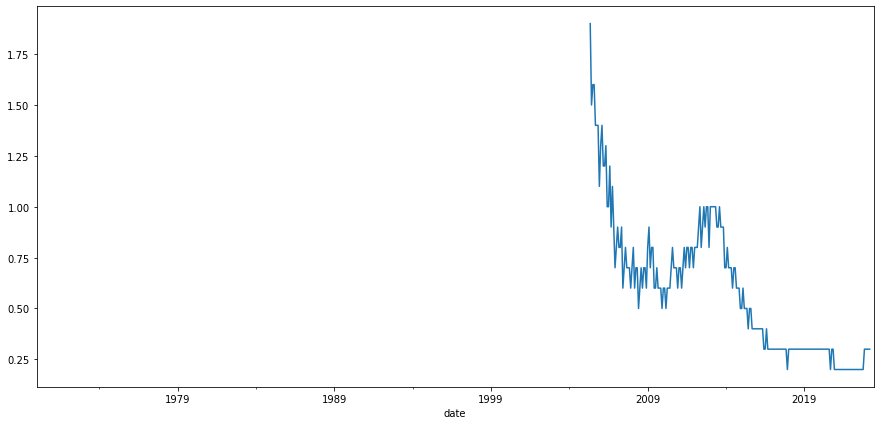

In [12]:
df_M['N92'].plot(figsize=(15,7))

In [13]:
_find_x12()

'x13as.exe'

In [14]:
var = 'N92' # '예금은행 총대출 금리' N72'한국은행 기준금리' N71 # '수출물가지수' L64
# x_path = 'D:\2023\Sadj\x13as_ascii-v1-1-b59\x13as'
# data = pd.DataFrame(df_M[var].dropna())
data = df_M[var].dropna()
# type(df_M)
# df_M
res = sm.tsa.x13_arima_select_order(data, outlier=False) #, x12path=x_path, prefer_x13=True)
print(res.order, res.sorder)

# results = sm.tsa.x13_arima_analysis(data)

# fig = results.plot()
# fig.set_size_inches(12, 5)
# fig.tight_layout()

(0, 1, 1) (0, 1, 1)


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


<AxesSubplot:xlabel='date'>

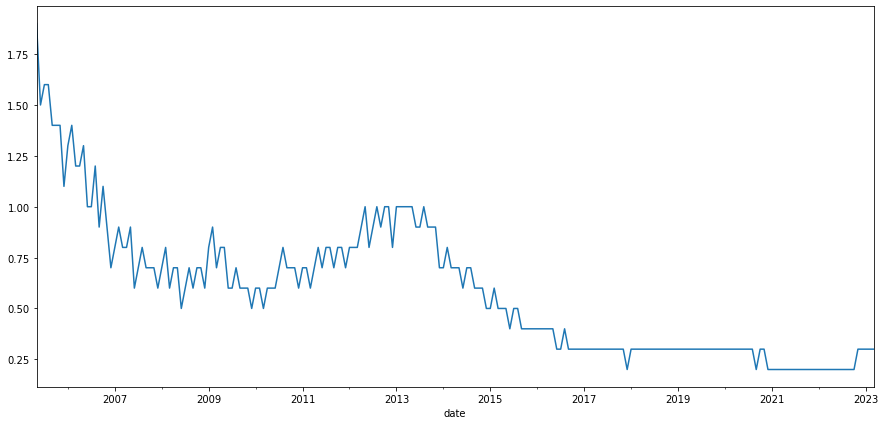

In [15]:
# data.plot(title="{}".format(var_info['Variable'][var_info['ID']==var])\
    # , figsize=(15,10))
data.plot(figsize=(15,7))

c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


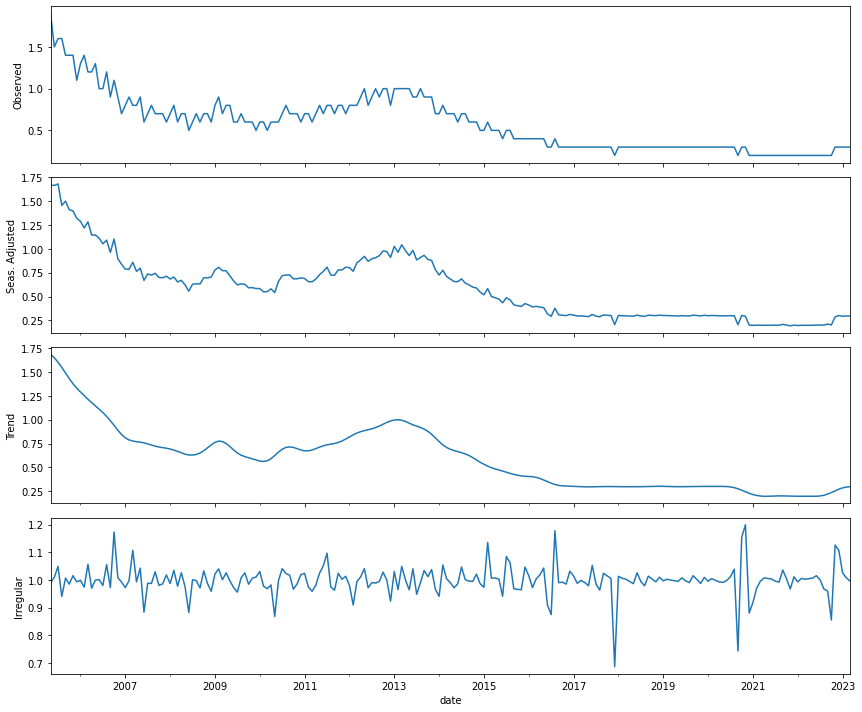

In [16]:
results = sm.tsa.x13_arima_analysis(data,outlier=False)
fig = results.plot()
fig.set_size_inches(12, 10)
fig.tight_layout()

In [17]:
for i, var in enumerate(df_M.columns):
  # print(i)
  if atr := var_info['X13-arima'][var_info['ID']==var].values == 'o':
    if var in ['L64','N71','N72','N76','N91','N92']: # 수출물가지수, 예금은행 총대출 금리
      print(f"x12-arima 계절조정 작업 : {var} ------- {var_info['Variable'][var_info['ID']==var]}")
      data = df_M[var].dropna()
      results = sm.tsa.x13_arima_analysis(data, outlier=False)
    else:
      print(f"x12-arima 계절조정 작업 : {var} ------- {var_info['Variable'][var_info['ID']==var]}")
      data = df_M[var].dropna()
      results = sm.tsa.x13_arima_analysis(data)
    df_M[var]=results.seasadj
  else:
    continue

x12-arima 계절조정 작업 : G33 ------- 33    기계수주액
Name: Variable, dtype: object
x12-arima 계절조정 작업 : H34 ------- 34    미분양주택현황
Name: Variable, dtype: object
x12-arima 계절조정 작업 : H35 ------- 35    주택건설인허가실적
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : H36 ------- 36    아파트 매매 실거래가격지수
Name: Variable, dtype: object
x12-arima 계절조정 작업 : I37 ------- 37    신용카드 이용건수
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : I38 ------- 38    신용카드 이용금액
Name: Variable, dtype: object
x12-arima 계절조정 작업 : I39 ------- 39    소비자동향조사_CSI\n(현재경기판단)
Name: Variable, dtype: object
x12-arima 계절조정 작업 : J40 ------- 40    전산업(업황실적)
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : J41 ------- 41    전산업(매출실적)
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : J42 ------- 42    제조업(업황실적)
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : J43 ------- 43    제조업(매출실적)
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: Visually significant seasonal and trading day peaks have 
          been found in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : J44 ------- 44    제조업(수출실적)
Name: Variable, dtype: object
x12-arima 계절조정 작업 : J45 ------- 45    제조업(가동률실적)
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : J46 ------- 46    제조업(설비투자실적)
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : J47 ------- 47    경제심리지수(순환변동치)
Name: Variable, dtype: object
x12-arima 계절조정 작업 : J48 ------- 48    기대인플레이션율
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : L53 ------- 53    원/달러(종가,말일) 환율
Name: Variable, dtype: object
x12-arima 계절조정 작업 : L54 ------- 54    국별수출(관세청 통관기준)
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : L55 ------- 55    국별수입(관세청 통관기준)
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : L56 ------- 56    수출금액지수
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : L57 ------- 57    수입금액지수
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : L58 ------- 58    외환보유액
Name: Variable, dtype: object
x12-arima 계절조정 작업 : L64 ------- 64    수출물가지수
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : L65 ------- 65    수입물가지수
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : M66 ------- 66    본원통화(말잔)
Name: Variable, dtype: object
x12-arima 계절조정 작업 : M67 ------- 67    M1(말잔)
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : M68 ------- 68    M2(말잔)
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : M69 ------- 69    Lf(말잔)
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : M70 ------- 70    L(광의유동성)(말잔)
Name: Variable, dtype: object
x12-arima 계절조정 작업 : N71 ------- 71    한국은행 기준금리
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : N72 ------- 72    예금은행 총대출 금리
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: Visually significant seasonal and trading day peaks have 
          been found in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : N73 ------- 73    기업대출 금리
Name: Variable, dtype: object
x12-arima 계절조정 작업 : N74 ------- 74    주택담보대출 금리
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : N75 ------- 75    전세자금대출 금리
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : N76 ------- 76    무담보콜금리 전체 금리
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : N77 ------- 77    KORIBOR(3개월) 금리
Name: Variable, dtype: object
x12-arima 계절조정 작업 : N78 ------- 78    CD(91일) 금리
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : N79 ------- 79    CP(91일) 금리
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : N80 ------- 80    국고채(1년) 금리
Name: Variable, dtype: object
x12-arima 계절조정 작업 : N81 ------- 81    국고채(10년) 금리
Name: Variable, dtype: object
x12-arima 계절조정 작업 : N82 ------- 82    회사채(3년, AA-) 금리
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : N83 ------- 83    예금은행 총수신(말잔)
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : N84 ------- 84    비은행기관 수신(말잔)
Name: Variable, dtype: object
x12-arima 계절조정 작업 : N85 ------- 85    예금은행 대출금(말잔)
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : N86 ------- 86    비은행금융기관 여신(말잔)
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : N87 ------- 87     가계대출
Name: Variable, dtype: object
x12-arima 계절조정 작업 : N88 ------- 88      (가계)주택담보대출
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : N89 ------- 89      (가계)기타대출
Name: Variable, dtype: object
x12-arima 계절조정 작업 : N90 ------- 90    예금은행예금회전율
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : N91 ------- 91    기업대출 연체율
Name: Variable, dtype: object
x12-arima 계절조정 작업 : N92 ------- 92    가계대출_연체율
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : N93 ------- 93    신용카드대출_연체율
Name: Variable, dtype: object
x12-arima 계절조정 작업 : O94 ------- 94      KOSPI_시가총액
Name: Variable, dtype: object
x12-arima 계절조정 작업 : O95 ------- 95      KOSPI_거래량
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: Visually significant seasonal and trading day peaks have 
          been found in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : O96 ------- 96      KOSPI_거래대금
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: Visually significant seasonal and trading day peaks have 
          been found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : O97 ------- 97      KOSDAQ_시가총액
Name: Variable, dtype: object
x12-arima 계절조정 작업 : O98 ------- 98      KOSDAQ_거래량
Name: Variable, dtype: object


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


x12-arima 계절조정 작업 : O99 ------- 99      KOSDAQ_거래대금
Name: Variable, dtype: object
x12-arima 계절조정 작업 : O100 ------- 100    채권_상장잔액
Name: Variable, dtype: object
x12-arima 계절조정 작업 : O101 ------- 101    채권_거래량
Name: Variable, dtype: object
x12-arima 계절조정 작업 : O102 ------- 102    채권_거래대금
Name: Variable, dtype: object


<Figure size 720x864 with 0 Axes>

<AxesSubplot:xlabel='date'>

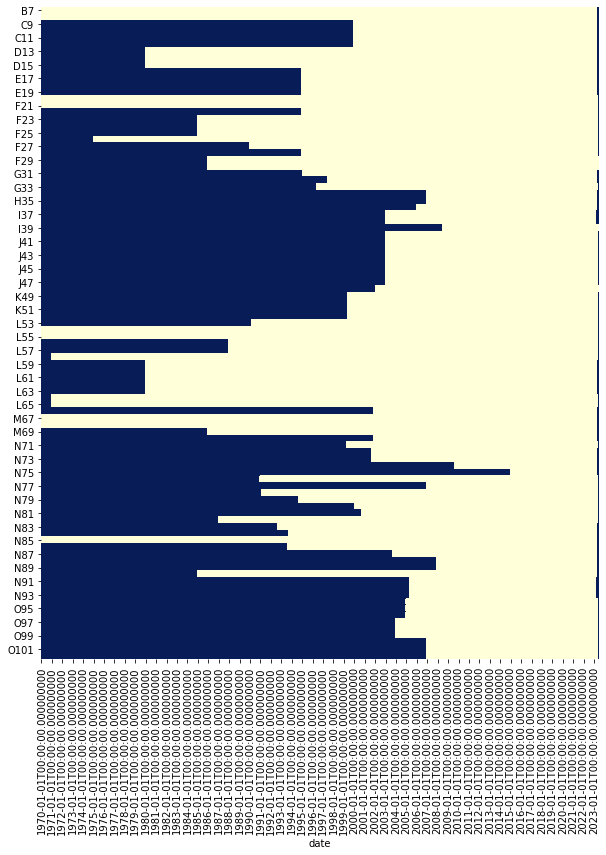

In [18]:
plt.figure(figsize=(10,12))
sns.heatmap(df_M.isna().transpose(),
            cmap="YlGnBu",
            cbar=False,
            # cbar_kws={'label': 'Missing Data'}
            )
plt.show()

In [30]:
save_dir= 'D:/2023/Data_WareHouse/ECOS(한국은행경제통계)/Data_02'
save_file = 'dataset_03_S.xlsx'
save_path = os.path.join(save_dir,save_file)
sheet_Q = 'df_Q'
sheet_M = 'df_M'

# writer=pd.ExcelWriter(save_path, engine='openpyxl')
# df_Q.to_excel(writer, index=True, sheet_name=sheet_Q)
# df_M.to_excel(writer, index=True, sheet_name=sheet_M)

if not os.path.exists(save_path):
    with pd.ExcelWriter(save_path, mode='w', engine='openpyxl') as writer:
        df_Q.to_excel(writer, index=True, sheet_name=sheet_Q)
else:
    with pd.ExcelWriter(save_path, mode='a', engine='openpyxl') as writer:
        df_Q.to_excel(writer, index=True, sheet_name=sheet_Q)
        
if not os.path.exists(save_path):
    with pd.ExcelWriter(save_path, mode='w', engine='openpyxl') as writer:
        df_M.to_excel(writer, index=True, sheet_name=sheet_M)
else:
    with pd.ExcelWriter(save_path, mode='a', engine='openpyxl') as writer:
        df_M.to_excel(writer, index=True, sheet_name=sheet_M)

BadZipFile: File is not a zip file